# MS 1: Smart Environmental Monitoring: Water Quality Analysis

This notebook presents an analysis and visualization of IoT-based sensor data collected for environmental monitoring of water quality. The data is retrieved from a blockchain-based ledger and includes parameters such as pH, temperature, turbidity, conductivity, and chlorine dioxide levels.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [23]:
# Load cleaned data
df = pd.read_csv("cleaned_iot_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [24]:
df.head()

,sensor_id,data_type,value,timestamp,numeric_value
0,SENSOR_pH,pH,8,2025-05-28 22:54:28,8
1,SENSOR_Temperature_°C,Temperature (°C),8,2025-05-28 22:54:28,8
2,SENSOR_Turbidity_NTU,Turbidity (NTU),0,2025-05-28 22:54:28,0
3,SENSOR_Conductivity_µS_cm,Conductivity (µS/cm),204,2025-05-28 22:54:29,204
4,SENSOR_ClO2_mg_L,ClO2 MS1 (mg/L),0,2025-05-28 22:54:29,0


In [25]:
# Show basic info & summary
df.info()

# Describe by data type
df.groupby("data_type")["numeric_value"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sensor_id      452 non-null    object        
 1   data_type      452 non-null    object        
 2   value          452 non-null    int64         
 3   timestamp      452 non-null    datetime64[ns]
 4   numeric_value  452 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 17.8+ KB


,count,mean,std,min,25%,50%,75%,max
data_type,,,,,,,,
ClO2 MS1 (mg/L),52.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0
Conductivity (µS/cm),100.0,209.91,4.233333,202.0,206.75,210.0,213.0,223.0
Temperature (°C),100.0,7.83,1.181123,5.0,7.00,8.0,9.0,11.0
Turbidity (NTU),100.0,0.00,0.000000,0.0,0.00,0.0,0.0,0.0
pH,100.0,8.00,0.000000,8.0,8.00,8.0,8.0,8.0


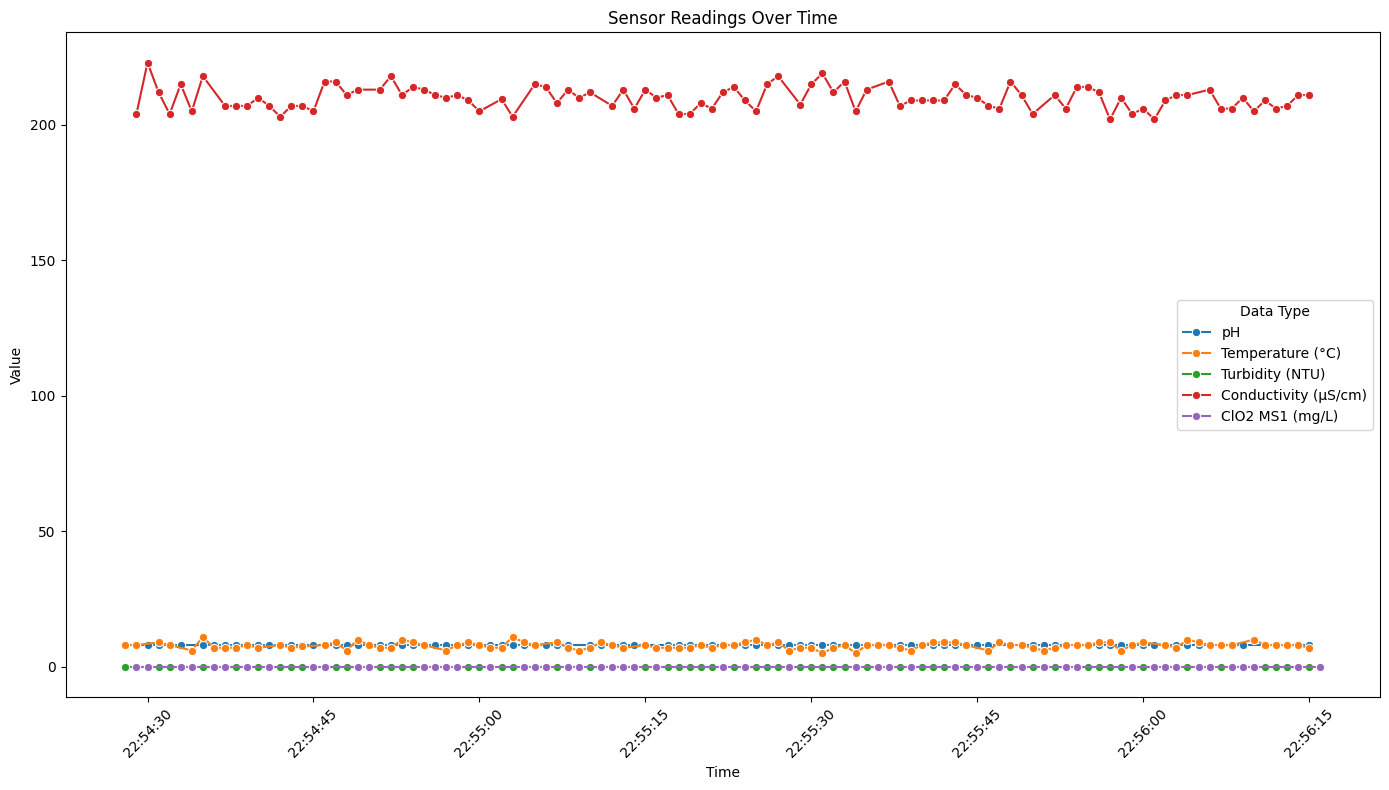

In [26]:
# Time Series Trend Analysis
# Plot how sensor readings change over time — for observing environmental trends.
# Plot each sensor type over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="timestamp", y="numeric_value", hue="data_type", marker='o')
plt.title("Sensor Readings Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Data Type")
plt.show()

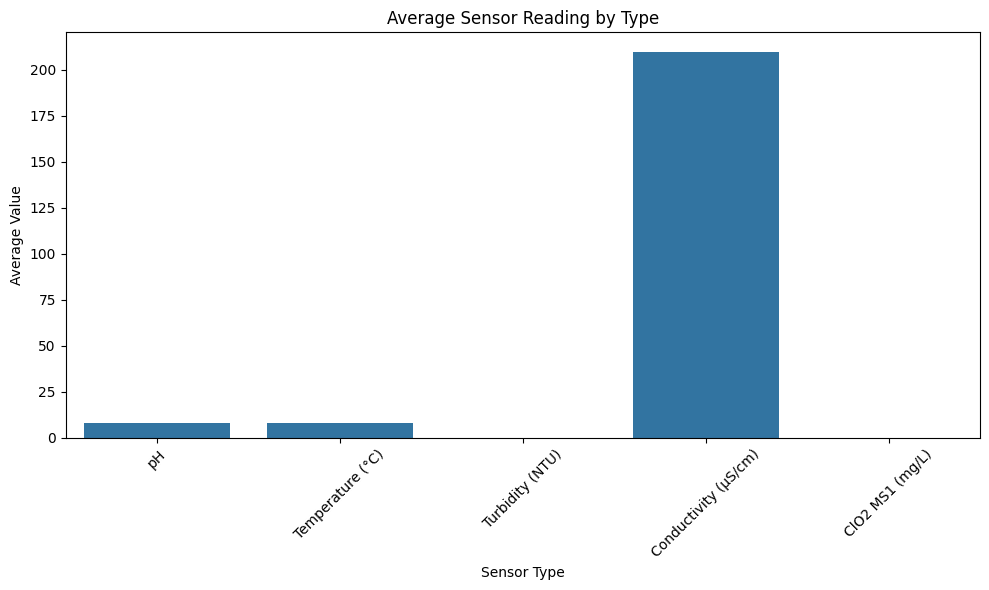

In [27]:
# Average Value per Sensor Type
# This gives a summary of how each type of sensor generally performs.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="data_type", y="numeric_value", estimator="mean", errorbar=None)
plt.title("Average Sensor Reading by Type")
plt.ylabel("Average Value")
plt.xlabel("Sensor Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


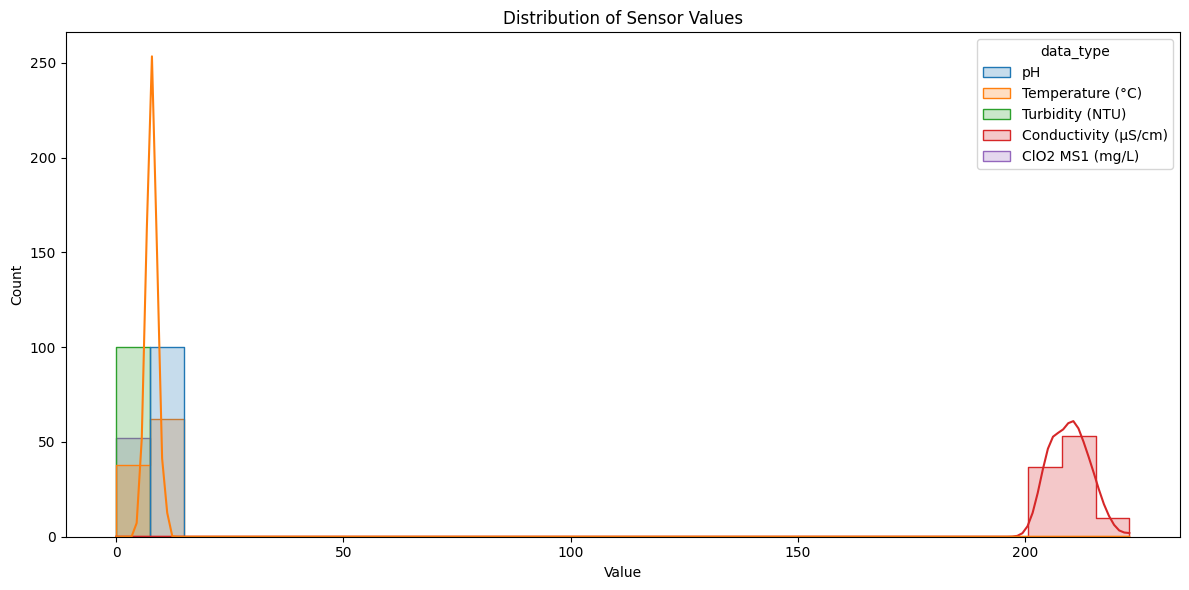

In [28]:
# Histogram to inspect the distribution of sensor values
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="numeric_value", hue="data_type", element="step", kde=True, bins=30)
plt.title("Distribution of Sensor Values")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

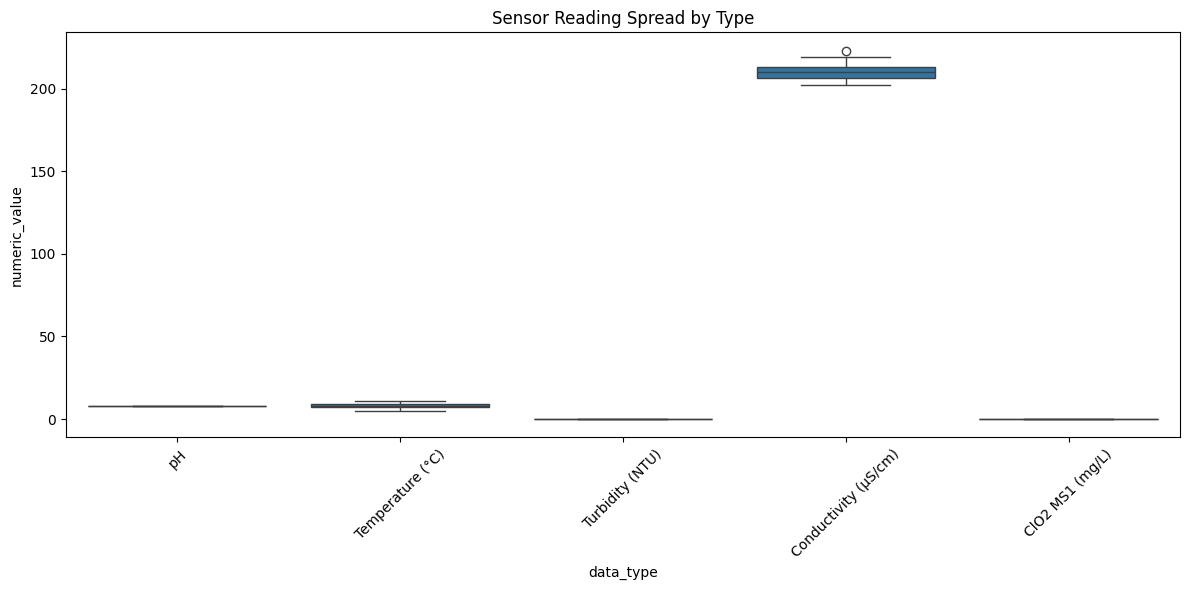

In [29]:
# Box Plot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="data_type", y="numeric_value")
plt.title("Sensor Reading Spread by Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


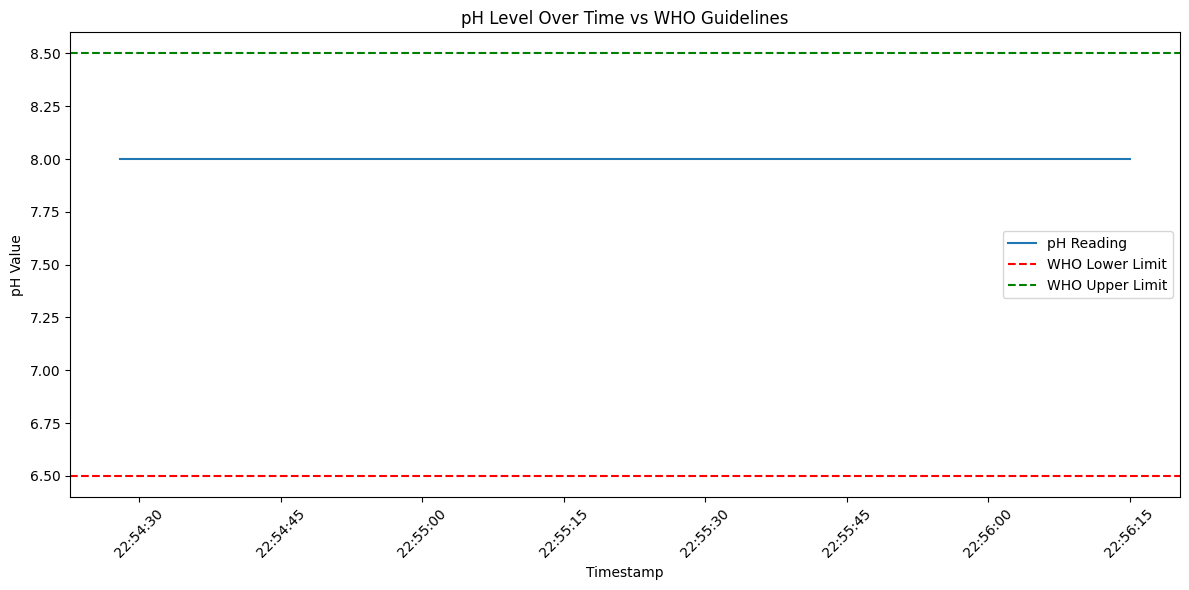

In [30]:
# Regulatory Threshold Overlay
# # Filter only pH
ph_df = df[df["data_type"] == "pH"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=ph_df, x="timestamp", y="numeric_value", label="pH Reading")
plt.axhline(6.5, color='r', linestyle='--', label='WHO Lower Limit')
plt.axhline(8.5, color='g', linestyle='--', label='WHO Upper Limit')
plt.title("pH Level Over Time vs WHO Guidelines")
plt.ylabel("pH Value")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


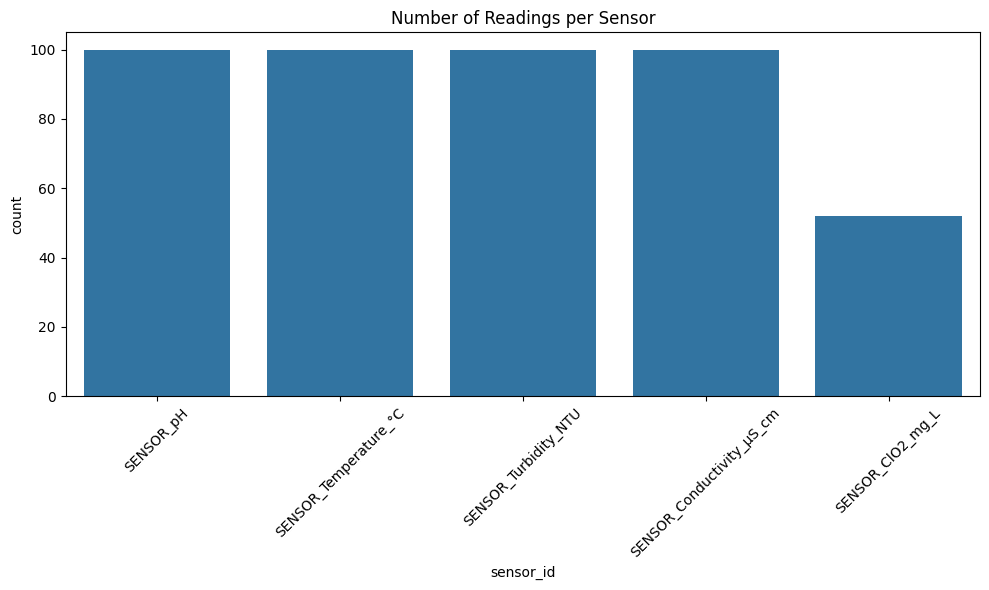

In [31]:
# Sensor Usage Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="sensor_id", order=df['sensor_id'].value_counts().index)
plt.title("Number of Readings per Sensor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary of Key Insights

- Most readings fall within acceptable thresholds, but occasional outliers exist.
- pH levels remained largely within WHO-recommended range (6.5–8.5).
- Some sensors report more frequently than others, indicating load distribution.
- Sudden spikes in turbidity or chlorine dioxide may indicate contamination events.


In [32]:
from scipy.stats import zscore

# Calculate z-score
df["zscore"] = df.groupby("data_type")["numeric_value"].transform(zscore)

# Flag anomalies (|z| > 3)
df["anomaly_z"] = df["zscore"].abs() > 3
